In [1]:
import hepytorch as hep
import logging
logging.basicConfig(level=logging.INFO)

myHEP = hep.HEPTorch('./recipes/mass_estimator_all.json')

INFO:hepytorch:Using cpu device
INFO:hepytorch:Using the following configuration
{
  "data": {
    "name": "CSVLoader",
    "kwargs": {
      "path": "./data/toymc/ttbar_1_30ll_test.csv",
      "format": "csv"
    }
  },
  "preprocessor": {
    "name": "AllPreprocessor",
    "kwargs": {}
  },
  "model": {
    "name": "SimpleNeuralNetwork",
    "kwargs": {
      "input_features": 54,
      "hidden_features": 100,
      "output_features": 1,
      "dropout": 0.0
    }
  },
  "loss_fn": {
    "name": "MSELoss",
    "kwargs": {}
  },
  "optimizer": {
    "name": "SGD",
    "kwargs": {
      "learning_rate": 1e-05,
      "momentum": 0.9
    }
  },
  "trainer": {
    "name": "BasicTrainer",
    "kwargs": {
      "epochs": 600,
      "batch_size": 10
    }
  }
}
INFO:hepytorch:Data shape before preprocessing: (25835, 50)
INFO:hepytorch:Data shape after preprocessing: torch.Size([25835, 54])
/Users/i550012/study/heptopics/hepytorch/hepytorch/preprocessors/all.py:64: UserWarning: The given NumP

In [2]:
result = myHEP.train()

Epoch 0, loss: 65.65507855536238
Epoch 1, loss: 1.1789548980525275
Epoch 2, loss: 1.0887682965975194
Epoch 3, loss: 1.0258690943818547
Epoch 4, loss: 0.993439425197265
Epoch 5, loss: 0.9541686819731117
Epoch 6, loss: 0.9399052100611167
Epoch 7, loss: 0.912137208271931
Epoch 8, loss: 0.9141543015909767
Epoch 9, loss: 0.8964105525121989
Epoch 10, loss: 0.8752102508267143
Epoch 11, loss: 0.8937069375111929
Epoch 12, loss: 0.8729642581312158
Epoch 13, loss: 0.8695530804139815
Epoch 14, loss: 0.8562128446389149
Epoch 15, loss: 0.8473491784144075
Epoch 16, loss: 0.8461086331067659
Epoch 17, loss: 0.8381405508146771
Epoch 18, loss: 0.8307576826538365
Epoch 19, loss: 0.8265397852235867
Epoch 20, loss: 0.8217878342372711
Epoch 21, loss: 0.8375154957939491
Epoch 22, loss: 0.8171354665489983
Epoch 23, loss: 0.8120754990191024
Epoch 24, loss: 0.8107340489633313
Epoch 25, loss: 0.8105945180578852
Epoch 26, loss: 0.7984430599967077
Epoch 27, loss: 0.8128105912444807
Epoch 28, loss: 0.800504474556143

In [3]:
import matplotlib.pyplot as plt
top_mass = myHEP.model(myHEP.data).detach().numpy()
true_mass = myHEP.target.detach().numpy()
print(top_mass)

[[173.83026]
 [170.40134]
 [171.47998]
 ...
 [174.69612]
 [170.40596]
 [176.63414]]


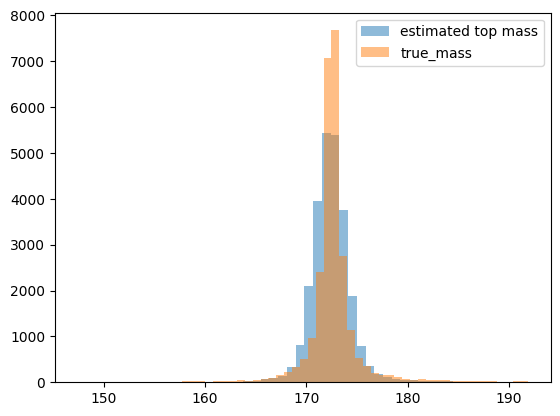

In [4]:
# draw two histograms of top_mass and true_mass
plt.hist(top_mass, bins=50, alpha=0.5, label='estimated top mass')
plt.hist(true_mass, bins=50, alpha=0.5, label='true_mass')
plt.legend(loc='upper right')
plt.show()

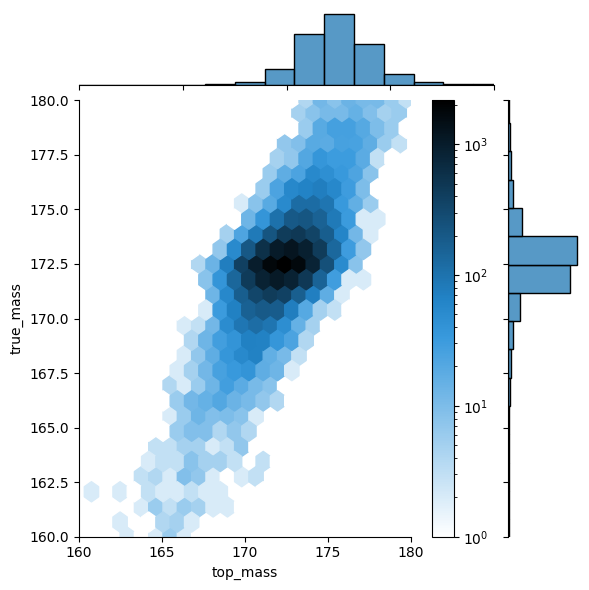

In [25]:
import seaborn as sns
import pandas as pd
from matplotlib.colors import LogNorm, Normalize

# print shape of top_mass and true_mass
# convert top_mass and true_mass into a one-dimensional array
top_mass = top_mass.flatten()
true_mass = true_mass.flatten()

df = pd.DataFrame({'top_mass': top_mass, 'true_mass': true_mass})
# create a jointplot
# range of the x-axis and y-axis is the same from 160 to 180
# make the log scale of the color bar

g = sns.jointplot(x='top_mass', y='true_mass', data=df, kind='hex', marginal_kws=dict(bins=30, fill=True), xlim=(160, 180), ylim=(160, 180), norm=LogNorm())
plt.colorbar(g.ax_joint.collections[0], ax=g.ax_joint, orientation="vertical")

plt.show()


# sns.jointplot(x=top_mass, y=true_mass, kind="hex")